In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def upwind_2(C, beta):
    j = np.array([1j])
    return - C/2 * (3-4*np.exp(-j*beta)+np.exp(-2*j*beta))

def rk2(mu):
    return np.abs(1+mu + mu**2/2)

C_ = np.linspace(-10, 10, 100)
beta_ = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(C_, beta_)

upw_ = upwind_2(X, Y)

rk2_ = rk2(upw)

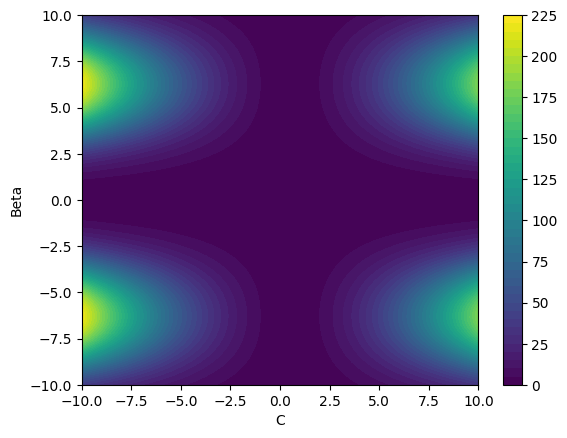

In [30]:
plt.contourf(X, Y, rk2_, levels=50, cmap="viridis")
plt.colorbar()
plt.xlabel("C")
plt.ylabel("Beta")
plt.show()